In [2]:
import matplotlib.pyplot as plt
import scipy.stats as stat
import numpy as np
import scipy.io

In [3]:
# load MAT file containing the 3D place fields inferred using the script "3D_place_fields_GP.m"
mat = scipy.io.loadmat('PFGP3D_N50.mat',squeeze_me=True)['pfs']
# this is a 5 dimensonal array.

In [15]:
# number of neurons
N = mat.shape[0]

In [5]:
# it contains place fields for: 
# - 50 cells
# - mean and STD in log-firing
# - tuning for x,y,k (20 X 20 X 10)

In [6]:
# load "real" synthetic data (i.e. what came out from the sampling of ground truth model)
x = np.loadtxt('x_Ising_Osc_50')
y = np.loadtxt('y_Ising_Osc_50_C')

In [7]:
# count the number of coactive cells
k = np.sum(y,1)

In [8]:
# bin behavior
B=20
bin_pos=stat.binned_statistic_2d(x.T[0],x.T[1],values=np.ones_like(x.T[0]),statistic='count',
                                     bins=np.arange(B+1)/B,expand_binnumbers=True)[3].T-1
# bin synchrony (i.e. K)
edges = [np.percentile(k,i*10) for i in range(11)]
bin_syn=stat.binned_statistic(k,values=np.ones_like(k),statistic='count',bins=edges)[2]-1

In [9]:
# mean log firing
mea = np.array([mat[:,0,b[0],b[1],bin_syn[ib]] for ib,b in enumerate(bin_pos)])
# std log firing
std = np.sqrt(np.array([mat[:,1,b[0],b[1],bin_syn[ib]] for ib,b in enumerate(bin_pos)]))

In [10]:
# measure real correlation
corr = np.corrcoef(y.T)

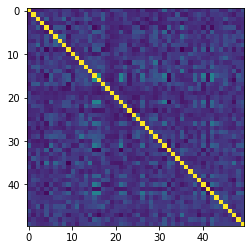

In [11]:
plt.imshow(corr)

In [18]:
# number of simulations
K=1000
# max number of rejections
maxiter=500

In [17]:
# simulate firing using null model
# save both the firing and the number of rejections of each sample
# problematic samples will be excluded from the computation of correlations
yfks = np.zeros([K, len(k), N])
cnts = np.zeros([K, len(k)])

In [ ]:
# simulate
# use rejaction sampling: whenever the number of neurons active is not the same, reject and resample
for i in range(K):
    ## sample posterior
    post = mea + np.random.randn(len(k))*std
    ## turn into firing rate
    fr = np.exp(post)
    ## rejection sampling
    yfake, count = rej_samp(fr)
    ## save firing and counts
    yfks[i] = yfake
    cnts[i] = count

In [ ]:
# check for problematic samples - exclude them
max_counts = np.max(cnts,0)
# print proportion of samples excluded
print(np.mean(max_counts) == maxiter-1)

In [ ]:
# compute correlations on sampled data
fkcors = np.zeros([K,N,N])
for i in range(K):
    fkcors[i] = np.corrcoef(yfks[i,max_counts<maxiter-1].T)

In [ ]:
# compute real correlation
real = np.corrcoef(y[max_counts<maxiter-1].T)

In [ ]:
# compute w: bla bla

In [ ]:
# save excess correlations